In [115]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# Data Loading

beer = pd.read_csv("MLB Beer Prices.csv")
games = pd.read_csv("baseballdata.csv")

In [3]:
beer.head()

,Year,Team,Nickname,City,Price,Size,Price per Ounce
0,2013,Arizona Diamondbacks,Diamondbacks,Arizona,4.00,14.0,0.285714
1,2013,Atlanta Braves,Braves,Atlanta,7.25,16.0,0.453125
2,2013,Baltimore Orioles,Orioles,Baltimore,6.75,18.0,0.375000
3,2013,Boston Red Sox,Red Sox,Boston,7.25,12.0,0.604167
4,2013,Chicago Cubs,Cubs,Chicago,7.25,16.0,0.453125


In [4]:
games.columns

Index(['Unnamed: 0', 'Rk', 'Year', 'Tm', 'Lg', 'G', 'W', 'L', 'Ties', 'W.L.',
       'pythW.L.', 'Finish', 'GB', 'Playoffs', 'R', 'RA', 'Attendance',
       'BatAge', 'PAge', 'X.Bat', 'X.P', 'Top.Player', 'Managers', 'current'],
      dtype='object')

In [5]:
# Data Cleaning and filtering

games = games[['Rk', 'Year', 'Tm', 'Lg', 'G', 'W', "L", 'Ties', 'W.L.', 'Attendance']]
games = games[games['Year']>=2013]
games.head()

,Rk,Year,Tm,Lg,G,W,L,Ties,W.L.,Attendance
0,1,2016,Arizona Diamondbacks,NL West,162,69,93,0,0.426,"2,036,216"
1,2,2015,Arizona Diamondbacks,NL West,162,79,83,0,0.488,"2,080,145"
2,3,2014,Arizona Diamondbacks,NL West,162,64,98,0,0.395,"2,073,730"
3,4,2013,Arizona Diamondbacks,NL West,162,81,81,0,0.500,"2,134,895"
19,1,2016,Atlanta Braves,NL East,161,68,93,0,0.422,"2,020,914"


In [6]:
games['Lg'].unique()

array(['NL West', 'NL East', 'AL East', 'NL Central', 'AL Central',
       'AL West'], dtype=object)

In [7]:
gamesMLB = games[(games['Lg'] == 'NL Central') | (games['Lg'] == 'NL East') | (games['Lg'] == 'NL West')
                 | (games['Lg'] == 'AL West') | (games['Lg'] == 'AL Central') | (games['Lg'] == 'AL East')]

In [8]:
gamesMLB['Tm'] = gamesMLB['Tm'].apply(lambda x: 'Los Angeles Angels' if x =='Los Angeles Angels of Anaheim' else x)

In [9]:
gamesMLB = gamesMLB .reset_index(drop = True)
gamesMLB

,Rk,Year,Tm,Lg,G,W,L,Ties,W.L.,Attendance
0,1,2016,Arizona Diamondbacks,NL West,162,69,93,0,0.426,"2,036,216"
1,2,2015,Arizona Diamondbacks,NL West,162,79,83,0,0.488,"2,080,145"
2,3,2014,Arizona Diamondbacks,NL West,162,64,98,0,0.395,"2,073,730"
3,4,2013,Arizona Diamondbacks,NL West,162,81,81,0,0.500,"2,134,895"
4,1,2016,Atlanta Braves,NL East,161,68,93,0,0.422,"2,020,914"
...,...,...,...,...,...,...,...,...,...,...
115,4,2013,Toronto Blue Jays,AL East,162,74,88,0,0.457,"2,536,562"
116,1,2016,Washington Nationals,NL East,162,95,67,0,0.586,"2,481,938"
117,2,2015,Washington Nationals,NL East,162,83,79,0,0.512,"2,619,843"
118,3,2014,Washington Nationals,NL East,162,96,66,0,0.593,"2,579,389"


In [23]:
df = beer.merge(gamesMLB, how = 'right', left_on=['Year','Team'], right_on = ['Year', 'Tm']).drop(columns = ['Ties', 'Tm'])
df['Attendance'] = df['Attendance'].apply(lambda x: int(re.sub('\W', "", x)))

In [24]:
df

,Year,Team,Nickname,City,Price,Size,Price per Ounce,Rk,Lg,G,W,L,W.L.,Attendance
0,2016,Arizona Diamondbacks,Diamondbacks,Arizona,4.00,14.0,0.285714,1,NL West,162,69,93,0.426,2036216
1,2015,Arizona Diamondbacks,Diamondbacks,Arizona,4.00,14.0,0.285714,2,NL West,162,79,83,0.488,2080145
2,2014,Arizona Diamondbacks,Diamondbacks,Arizona,4.00,14.0,0.285714,3,NL West,162,64,98,0.395,2073730
3,2013,Arizona Diamondbacks,Diamondbacks,Arizona,4.00,14.0,0.285714,4,NL West,162,81,81,0.500,2134895
4,2016,Atlanta Braves,Braves,Atlanta,7.75,16.0,0.484375,1,NL East,161,68,93,0.422,2020914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2013,Toronto Blue Jays,Blue Jays,Toronto,7.34,14.0,0.524286,4,AL East,162,74,88,0.457,2536562
116,2016,Washington Nationals,Nationals,Washington,6.50,16.0,0.406250,1,NL East,162,95,67,0.586,2481938
117,2015,Washington Nationals,Nationals,Washington,6.50,16.0,0.406250,2,NL East,162,83,79,0.512,2619843
118,2014,Washington Nationals,Nationals,Washington,6.50,16.0,0.406250,3,NL East,162,96,66,0.593,2579389


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Price per Ounce']), df['Price per Ounce'], test_size=0.2)

In [26]:
X_train

,Year,Team,Nickname,City,Price,Size,Rk,Lg,G,W,L,W.L.,Attendance
61,2015,Milwaukee Brewers,Brewers,Milwaukee,6.00,16.0,2,NL Central,162,68,94,0.420,2542558
88,2016,San Diego Padres,Padres,San Diego,5.00,14.0,1,NL West,162,68,94,0.420,2351422
44,2016,Kansas City Royals,Royals,Kansas City,6.50,16.0,1,AL Central,162,81,81,0.500,2557712
69,2015,New York Mets,Mets,New York,5.75,12.0,2,NL East,162,90,72,0.556,2569753
6,2014,Atlanta Braves,Braves,Atlanta,7.25,16.0,3,NL East,162,79,83,0.488,2354305
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2016,Arizona Diamondbacks,Diamondbacks,Arizona,4.00,14.0,1,NL West,162,69,93,0.426,2036216
26,2014,Cincinnati Reds,Reds,Cincinnati,5.50,12.0,3,NL Central,162,76,86,0.469,2476664
98,2014,Seattle Mariners,Mariners,Seattle,6.00,12.0,3,AL West,162,87,75,0.537,2064334
7,2013,Atlanta Braves,Braves,Atlanta,7.25,16.0,4,NL East,162,96,66,0.593,2548679


<AxesSubplot:xlabel='Attendance', ylabel='Price per Ounce'>

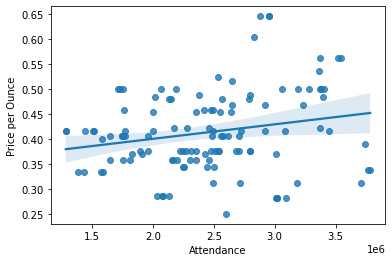

In [27]:
# Relationship between Attendance and Price per Ounce

sns.regplot(x='Attendance', y="Price per Ounce", data=df)

(array([2., 1., 2., 2., 3., 2., 1., 9., 2., 1., 3., 3., 4., 4., 5., 5., 2.,
        4., 5., 9., 6., 5., 4., 1., 5., 1., 4., 4., 2., 1., 2., 2., 0., 7.,
        1., 1., 1., 0., 1., 3.]),
 array([1286163.  , 1348567.35, 1410971.7 , 1473376.05, 1535780.4 ,
        1598184.75, 1660589.1 , 1722993.45, 1785397.8 , 1847802.15,
        1910206.5 , 1972610.85, 2035015.2 , 2097419.55, 2159823.9 ,
        2222228.25, 2284632.6 , 2347036.95, 2409441.3 , 2471845.65,
        2534250.  , 2596654.35, 2659058.7 , 2721463.05, 2783867.4 ,
        2846271.75, 2908676.1 , 2971080.45, 3033484.8 , 3095889.15,
        3158293.5 , 3220697.85, 3283102.2 , 3345506.55, 3407910.9 ,
        3470315.25, 3532719.6 , 3595123.95, 3657528.3 , 3719932.65,
        3782337.  ]),
 <BarContainer object of 40 artists>)

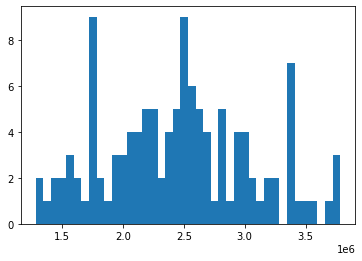

In [28]:
# Looking at the spread of attendance

plt.hist(df['Attendance'], bins = 40)

(array([ 1.,  0.,  0.,  1.,  5.,  3., 11.,  6., 12.,  9.,  8.,  6., 11.,
        10., 12.,  8.,  6.,  9.,  1.,  1.]),
 array([0.315  , 0.33125, 0.3475 , 0.36375, 0.38   , 0.39625, 0.4125 ,
        0.42875, 0.445  , 0.46125, 0.4775 , 0.49375, 0.51   , 0.52625,
        0.5425 , 0.55875, 0.575  , 0.59125, 0.6075 , 0.62375, 0.64   ]),
 <BarContainer object of 20 artists>)

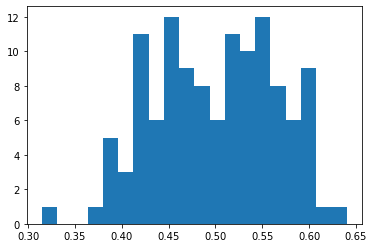

In [29]:
# Looking at the spread of W.L. Ratios

plt.hist(df['W.L.'], bins = 20)

In [131]:
# Model training and prediction

ct = ColumnTransformer(
    [("std", StandardScaler(), ['W.L.', 'Attendance']),
    ("Oc", OrdinalEncoder(), ['Rk']),
    ("norm2", OneHotEncoder(drop='first'), ['Lg', 'Year', 'City'])], remainder = 'drop')


pl = Pipeline([('ct', ct), ('lr', LinearRegression())])
pl.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['W.L.', 'Attendance']),
                                                 ('Oc', OrdinalEncoder(),
                                                  ['Rk']),
                                                 ('norm2',
                                                  OneHotEncoder(drop='first'),
                                                  ['Lg', 'Year', 'City'])])),
                ('lr', LinearRegression())])

In [132]:
pl.predict(X_test)

array([0.41269364, 0.41830681, 0.45821549, 0.41998828, 0.40527331,
       0.47808191, 0.42848991, 0.28515963, 0.36125467, 0.53198466,
       0.53199221, 0.39208885, 0.5655833 , 0.32952042, 0.52929834,
       0.36232208, 0.33513272, 0.55822159, 0.40486348, 0.47358021,
       0.42836077, 0.32109021, 0.36938914, 0.40597835])

In [133]:
pred = pl.predict(X_test)

In [134]:
cal = pd.DataFrame()

In [135]:
cal['actual'] = y_test 
cal['pred'] = pred


In [136]:
#CALCULATING MSE

np.mean((y_test-pred)**2)**(1/2)

0.04854474985203418